In [51]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [2]:
df = pd.read_csv('data\\creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


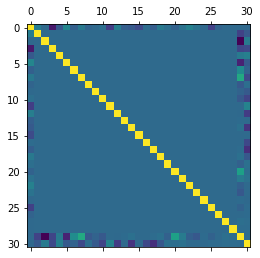

In [69]:
plt.matshow(df.corr())

In [17]:
# Уменьшим размерность до 2D
pca = PCA(n_components=2, random_state=1)
reduced_features = pca.fit_transform(df)

#go.Figure(data=[go.Scatter(x=reduced_features[:, 1], y=reduced_features[:, 0], mode='markers')]).show()

In [47]:
model = keras.Sequential()
model.add(layers.Dense(128, activation="tanh", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dense(128, activation="tanh", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dense(10, activation="softmax"))
model.compile(
    keras.optimizers.SGD(learning_rate=0.001), 
    keras.losses.MeanSquaredError(reduction='sum'),
    metrics=['accuracy']
)

In [45]:
train_x = df.loc[0:200000, ['Time', 'V4', 'V9', 'Amount']]
train_y = df.loc[0:200000, 'Class']

test_x = df.loc[200000:250000, ['Time', 'V4', 'V9', 'Amount']]
test_y = df.loc[200000:250000, 'Class']

In [44]:
train_x

,Time,V1,V2,Amount
0,0.0,-1.359807,-0.072781,149.62
1,0.0,1.191857,0.266151,2.69
2,1.0,-1.358354,-1.340163,378.66
3,1.0,-0.966272,-0.185226,123.50
4,2.0,-1.158233,0.877737,69.99
...,...,...,...,...
199996,133236.0,-0.083310,1.950405,151.64
199997,133236.0,-1.943282,0.898549,108.21
199998,133236.0,-1.103962,0.940976,1.00
199999,133236.0,2.320998,-0.496412,1.79


In [48]:
model.fit(train_x, train_y, epochs=100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

6251/6251 [==============================] - 7s 1ms/step - loss: 0.5029 - accuracy: 0.0361
Epoch 2/100
6251/6251 [==============================] - 7s 1ms/step - loss: 0.4988 - accuracy: 6.2500e-04
Epoch 3/100
6251/6251 [==============================] - 7s 1ms/step - loss: 0.4956 - accuracy: 6.3000e-04
Epoch 4/100
6251/6251 [==============================] - 7s 1ms/step - loss: 0.4925 - accuracy: 5.7000e-04
Epoch 5/100
6251/6251 [==============================] - 7s 1ms/step - loss: 0.4894 

6251/6251 [==============================] - 5s 812us/step - loss: 0.3935 - accuracy: 0.0013
Epoch 70/100
6251/6251 [==============================] - 5s 833us/step - loss: 0.3929 - accuracy: 0.0013
Epoch 71/100
6251/6251 [==============================] - 5s 784us/step - loss: 0.3923 - accuracy: 0.0013
Epoch 72/100
6251/6251 [==============================] - 5s 793us/step - loss: 0.3918 - accuracy: 0.0013
Epoch 73/100
6251/6251 [==============================] - 5s 810us/step - loss: 0.3912 - accuracy: 0.0011
Epoch 74/100
6251/6251 [==============================] - 5s 798us/step - loss: 0.3907 - accuracy: 0.0013
Epoch 75/100
6251/6251 [==============================] - 6s 888us/step - loss: 0.3901 - accuracy: 0.0013
Epoch 76/100
6251/6251 [==============================] - 5s 803us/step - loss: 0.3896 - accuracy: 0.0013
Epoch 77/100
6251/6251 [==============================] - 5s 813us/step - loss: 0.3891 - accuracy: 0.0011
Epoch 78/100
6251/6251 [==============================] - 5

In [52]:
y_hat = model.predict(test_x)
y_hat = [np.argmax(y) for y in y_hat]

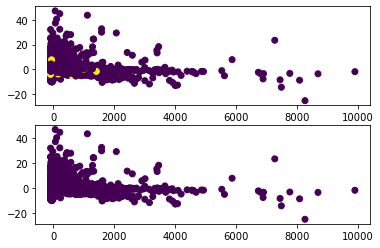

In [71]:
reduced_features = PCA(n_components=2, random_state=1).fit_transform(df.loc[200000:250000, ['V2', 'V11', 'Amount']])

fig, axs = plt.subplots(2, 1)
scatter = axs[0].scatter(reduced_features[:, 0], reduced_features[:, 1], c=test_y)
scatter = axs[1].scatter(reduced_features[:, 0], reduced_features[:, 1], c=y_hat)
#legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
#ax.add_artist(legend)
plt.show()